## Logistic Regression for detecting Edibility of Mushrooms

### Importing some standard libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the Data

In [2]:
df = pd.read_csv("C:\\Users\\shikha alva\\Downloads\\Mushroom Dataset\\mushroom_cleaned.csv")

In [3]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [4]:
df.sample(5)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
26198,1438,6,1,5,0.215291,2766,11,0.943195,1
37596,688,6,5,3,0.147648,814,6,0.943195,1
50860,783,2,0,0,0.438114,1910,11,0.943195,0
29373,1189,5,1,6,0.127753,1694,11,0.888450,0
30019,746,6,2,7,0.000426,955,6,0.888450,0


In [5]:
df.shape

(54035, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [7]:
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

### There are no non-null values in the dataset

In [8]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [9]:
df.corr()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
cap-diameter,1.000000,0.204011,0.200481,0.186377,0.135652,0.828469,0.121856,0.113334,-0.165676
cap-shape,0.204011,1.000000,0.043066,0.131387,-0.010393,0.222494,0.029035,0.055442,-0.133338
gill-attachment,0.200481,0.043066,1.000000,0.100276,-0.075284,0.245300,0.020073,-0.040315,-0.052541
gill-color,0.186377,0.131387,0.100276,1.000000,0.015057,0.110283,0.186090,0.059965,-0.063947
stem-height,0.135652,-0.010393,-0.075284,0.015057,1.000000,0.098095,0.002624,-0.000292,0.183354
stem-width,0.828469,0.222494,0.245300,0.110283,0.098095,1.000000,0.157394,0.040679,-0.182856
stem-color,0.121856,0.029035,0.020073,0.186090,0.002624,0.157394,1.000000,0.010750,-0.128339
season,0.113334,0.055442,-0.040315,0.059965,-0.000292,0.040679,0.010750,1.000000,-0.082919
class,-0.165676,-0.133338,-0.052541,-0.063947,0.183354,-0.182856,-0.128339,-0.082919,1.000000


### EDA And Visualizations

<AxesSubplot:xlabel='class', ylabel='count'>

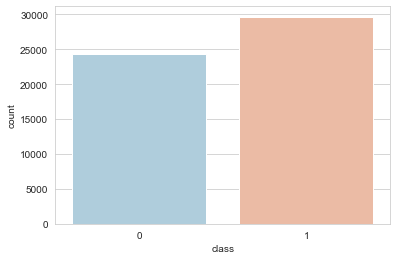

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='class',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='class', ylabel='count'>

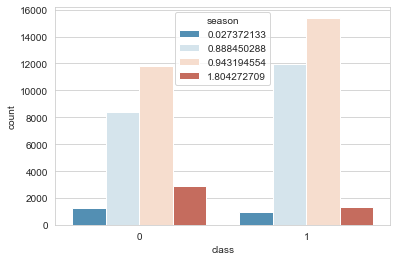

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='class',hue='season',data=df,palette='RdBu_r')

Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.


<AxesSubplot:>

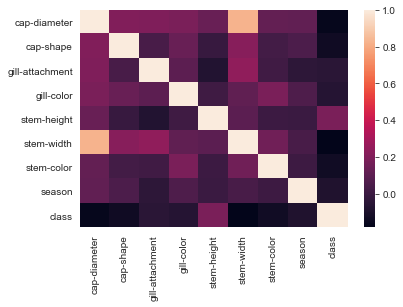

In [12]:
sns.heatmap(df.corr())

In [13]:
df_input = df.iloc[:,:-1]
df_output = df.iloc[:,-1]

In [14]:
df_input

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195
...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195
54031,82,2,3,2,1.186164,490,12,0.943195
54032,82,5,3,2,0.915593,584,12,0.888450
54033,79,2,3,2,1.034963,491,12,0.888450


### Splitting The Dataset

In [15]:
X = df_input
y = df_output

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=0)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37824, 8), (16211, 8), (37824,), (16211,))

### Feature Scaling 

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

### Predictions and Evaluations

In [21]:
y_pred = lr.predict(X_test_scaled)

In [22]:
print("Accuracy score is {}".format(lr.score(X_test_scaled, y_test)))

Accuracy score is 0.6316081672938129


In [23]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57      7308
           1       0.65      0.71      0.68      8903

    accuracy                           0.63     16211
   macro avg       0.63      0.62      0.62     16211
weighted avg       0.63      0.63      0.63     16211



### Precision:
Precision tells us how many of the predicted "positive" cases are actually positive.

In this case:

For class 0 (the first row), 60% of the mushrooms predicted as not edible (0) were actually not edible.

For class 1 (the second row), 65% of the mushrooms predicted as edible (1) were actually edible.

### Recall: 
Recall tells us how many of the actual "positive" cases were predicted correctly.

Here:

For class 0, 54% of the actual not edible mushrooms were correctly identified.

For class 1, 71% of the actual edible mushrooms were correctly identified.

In [24]:
#Confusion matrix for the LR classification

print(confusion_matrix(y_test, y_pred))

[[3912 3396]
 [2576 6327]]


In [25]:
from sklearn.model_selection import cross_val_score

#Now evaluation using cross validation.

LR_eval = cross_val_score(estimator = lr, X = X_train_scaled, y = y_train, cv = 10)
LR_eval.mean()

0.6349674564869165

In [26]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred)

13.278187529443441

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6316081672938129

Training Accuracy =  63.5  %
Testing Accuracy =  63.16  %


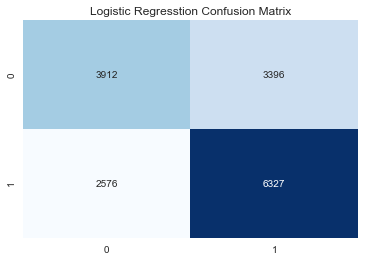

In [28]:
y_pred = lr.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
lr_train_acc = round(accuracy_score(y_train,lr.predict(X_train_scaled))*100,2)
lr_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , lr_train_acc,' %')
print('Testing Accuracy = ' , lr_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Logistic Regresstion Confusion Matrix');